In [1]:
%display latex

In [2]:
import sys, os, warnings
from contextlib import contextmanager

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout


@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [3]:
from lbuc import *
from lbuc.bondcalculus import *

## Model

In [4]:
m = BondModel("WhelksAndLobsters.bond")

Running cmd: 'load "WhelksAndLobsters.bond"' ...


In [5]:
s3 = m.process("[0, 1.4] Whelk || [0, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)").as_system

Running cmd: 'savesage "[0, 1.4] Whelk || [0, 8] Lobster with network N(0.8, 0.6, 0.3, 0.05, 2)" "/tmp/bond-sage-script-g3em44mz.py"' ...


In [6]:
kwargs = dict(step=(0.01, 0.1), order=6, estimation=1e-4, cutoff_threshold=1e-15, integration_method=2)

/usr/lib64/python3.8/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


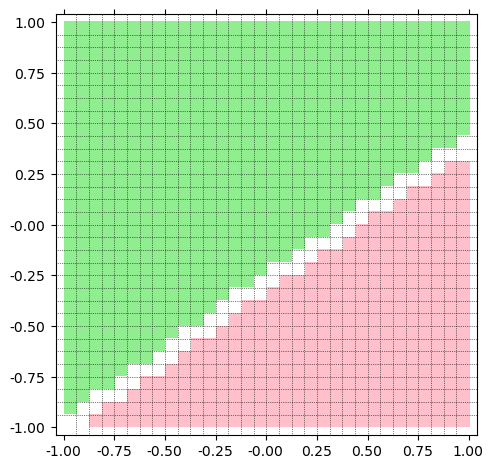

In [7]:
with suppress_stdout():
    csig1 = Atomic(8*var("Whelk") > var("Lobster")).context_signal_for_system(s3, 0, **kwargs)
    plo = csig1.plot_histogram2d(5)
    
plo

In [9]:
from lbuc.context_signals import RestrictionMethod

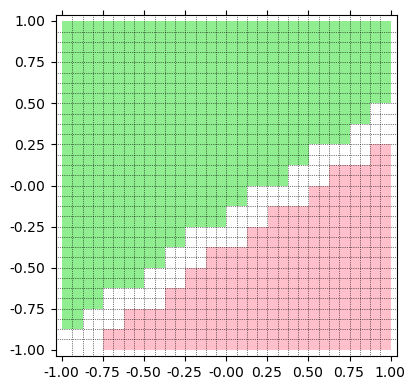

In [10]:
with suppress_stdout():
    csig1 = Atomic(8*var("Whelk") > var("Lobster")).context_signal_for_system(s3, 0, restriction_method=RestrictionMethod.RECOMPUTE_FLOWPIPE, **kwargs)
    plo = csig1.plot_histogram2d(5)
    
plo